<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/Week_7_Responsi_Celinka_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Celinka Eira - 0706022210042**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [88]:
import pandas as pd #import data dari csv/excel dll
import numpy as np #import linear algebra, manipulasi array
import matplotlib.pyplot as plt #menampilkan visualisasi data
import seaborn as sns #menampilkan visualisasi statistik dri data
from sklearn.preprocessing import LabelEncoder #mengubah label kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #membagi dataset menjadi data pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #membuat model pohon keputusan
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluasi model
from sklearn import tree #visualisasi pohon keputusan
from sklearn.naive_bayes import GaussianNB #membuat model Naive Bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

## Load Dataset

In [89]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/Bank.csv', delimiter=';')
df.head() #menampilkan 5 dataset teratas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [91]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [92]:
columns = ['age', 'job', 'marital', 'education', 'default', 'balance',
           'housing', 'loan', 'contact', 'day', 'month', 'duration',
           'campaign', 'pdays', 'previous', 'poutcome', 'y']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


Value counts for job:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for education:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for default:
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for balance:
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Le

In [93]:
df.replace("unknown", np.nan, inplace=True)

In [94]:
df.isnull().sum() # setelah di replace unknown nya

,0
age,0
job,38
marital,0
education,187
default,0
balance,0
housing,0
loan,0
contact,1324
day,0


In [95]:
for col in ['job', 'education', 'contact', 'poutcome']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [96]:
df.isnull().sum() # cek missing value setelah di fill missing value nya

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


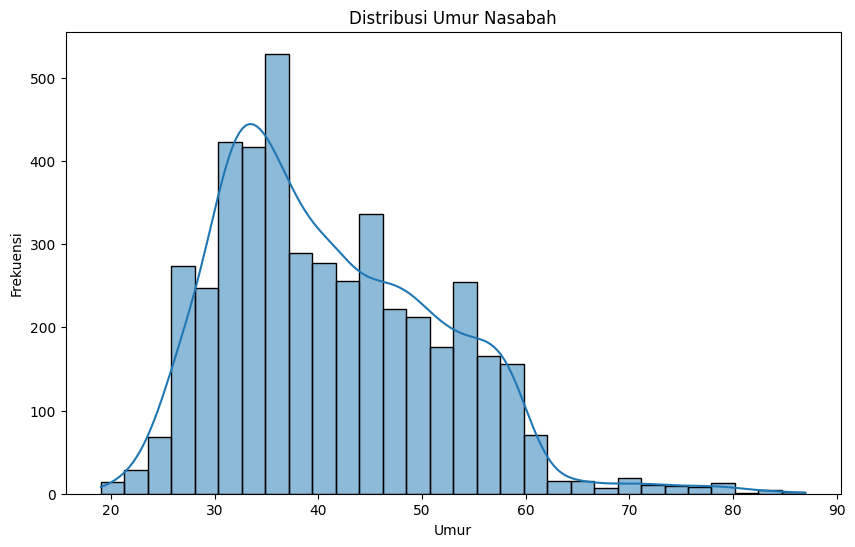

In [97]:
# Distribusi Umur Nasabah
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur Nasabah')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

diperlihatkan distribusi umur nasabah. Sumbu horizontal menunjukkan umur, dan sumbu vertikal menunjukkan frekuensi atau jumlah nasabah dalam rentang umur tertentu. Distribusi umur nasabah terlihat memiliki bentuk unimodal, dengan puncak di usia 30-40 tahun. Sebagian besar nasabah berada dalam rentang usia 30-50 tahun, sementara jumlah nasabah berkurang drastis setelah usia 60. Garis kurva densitas di atas histogram menunjukkan pola distribusi yang mendekati distribusi normal, meskipun sedikit miring ke kanan. Hal ini menunjukkan bahwa nasabah dalam data ini didominasi oleh kelompok usia dewasa muda hingga setengah baya, dengan sedikit nasabah yang berusia lebih tua.

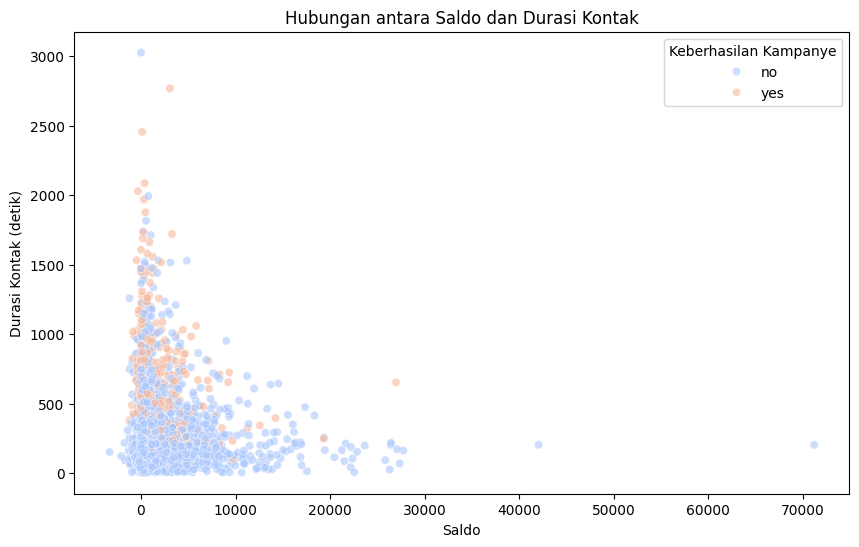

In [98]:
# Hubungan antara Saldo dan Durasi Kontak
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='duration', hue='y', data=df, palette='coolwarm', alpha=0.6)
plt.title('Hubungan antara Saldo dan Durasi Kontak')
plt.xlabel('Saldo')
plt.ylabel('Durasi Kontak (detik)')
plt.legend(title='Keberhasilan Kampanye')
plt.show()

Sebagian besar titik terkonsentrasi di bagian saldo rendah (di bawah 10.000) dan durasi kontak yang singkat (kurang dari 500 detik).
Nasabah dengan durasi kontak yang lebih lama (lebih dari 1000 detik) cenderung memiliki saldo lebih rendah.Nasabah dengan saldo lebih tinggi (lebih dari 10.000), durasi kontak umumnya singkat, menunjukkan bahwa kontak yang lebih lama tidak umum pada nasabah dengan saldo besar.
Warna merah muda (kampanye berhasil) lebih banyak muncul pada titik dengan saldo rendah dan durasi kontak yang lebih lama, mengindikasikan bahwa kontak yang lebih lama bisa saja meningkatkan peluang keberhasilan kampanye pada nasabah tertentu.

In [99]:
df['job'] = df['job'].replace({'admin': 'admin_management', 'management': 'admin_management'})
print(df['job'].value_counts()) # cek value counts setelah di merge

job
admin_management    1007
blue-collar          946
technician           768
admin.               478
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
Name: count, dtype: int64


## Machine Learning (Split Data)

In [100]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,1,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,1,1,2,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,2,1,1,0,0,1,0,0,5,8,226,1,-1,0,0,0


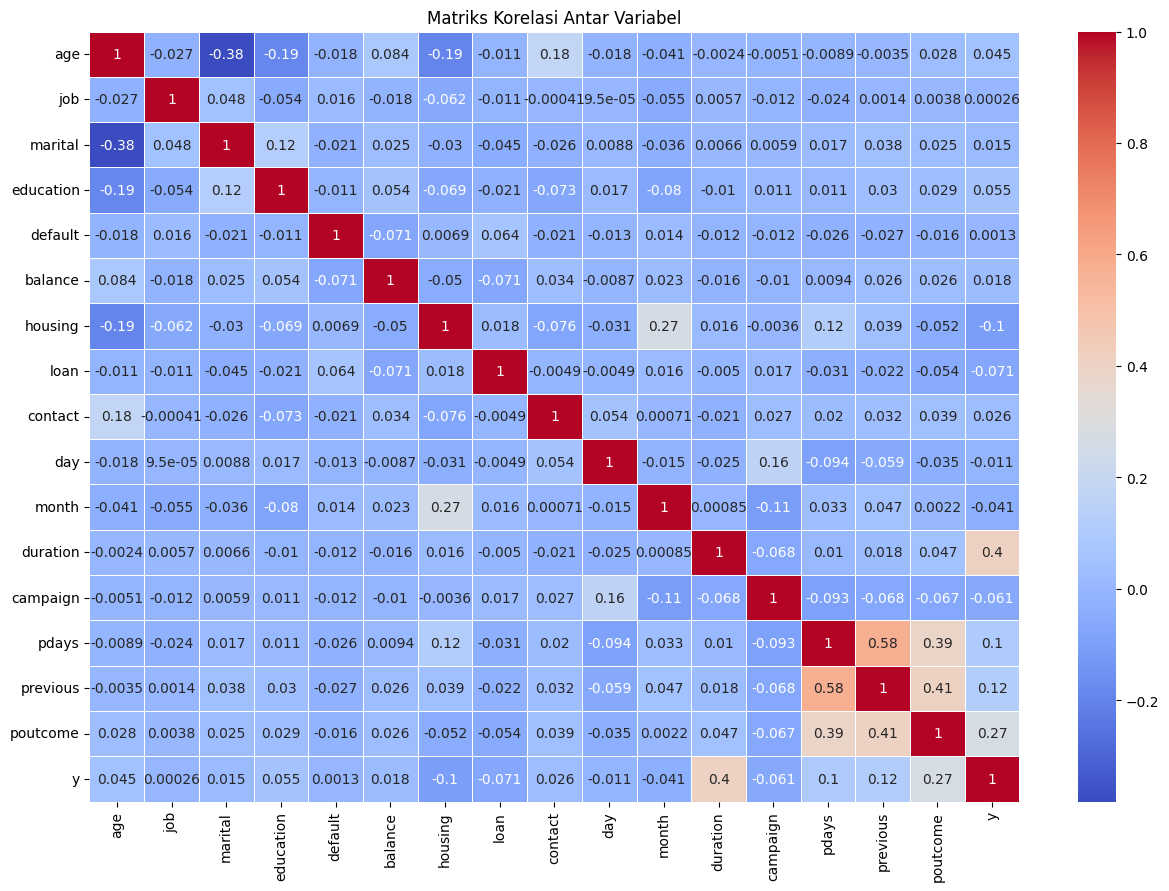

In [101]:
# Visualisasi Heatmap korelasi antar variabel
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

In [102]:
print(f"Nilai unik untuk kolom y:")
print(df["y"].unique())

Nilai unik untuk kolom y:
[0 1]


In [103]:
X = df.drop('y', axis=1)
y = df['y']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print(X_train.shape)
print(X_test.shape)


(3616, 16)
(905, 16)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [106]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score Random Forest:", accuracy)
print("Training set score Random Forest:", model.score(X_train, y_train))
print("Test set score Random Forest: " ,model.score(X_test, y_test))

Accuracy Score Random Forest: 0.9038674033149171
Training set score Random Forest: 1.0
Test set score Random Forest:  0.9038674033149171


In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Random Forest:\n", conf_matrix)

Confusion Matrix Random Forest:
 [[790  17]
 [ 70  28]]


In [109]:
class_report = classification_report(y_test, y_pred)
print("Classification Report Random Forest:\n", class_report)

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.62      0.29      0.39        98

    accuracy                           0.90       905
   macro avg       0.77      0.63      0.67       905
weighted avg       0.89      0.90      0.89       905



# Smoote


In [110]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 42)

In [112]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
y_pred_en = rf_clf.predict(X_test)

In [114]:
print('Model accuracy score with random forest after SMOTEENN: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with random forest after SMOTEENN: 0.9503


In [115]:
print('Training set score after SMOTEENN: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score after SMOTEENN: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score after SMOTEENN: 1.0000
Test set score after SMOTEENN: 0.9503


In [116]:
cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix after SMOTEENN:\n", cm)

Confusion Matrix after SMOTEENN:
 [[792  58]
 [ 33 947]]


In [117]:
print("Classification report after SMOTEENN:\n ", classification_report(y_test, y_pred_en))

Classification report after SMOTEENN:
                precision    recall  f1-score   support

           0       0.96      0.93      0.95       850
           1       0.94      0.97      0.95       980

    accuracy                           0.95      1830
   macro avg       0.95      0.95      0.95      1830
weighted avg       0.95      0.95      0.95      1830



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [118]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features = 4)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=4, random_state=42)

In [119]:
gradient_boost = model_gb.predict(X_test)

In [120]:
print("Model accuracy score with GradientBoostingClassifier:",accuracy_score(y_test, gradient_boost))

print("Training set score GradientBoostingClassifier: ", model_gb.score(X_train, y_train))

print("Test set score GradientBoostingClassifier: ", model_gb.score(X_test, y_test))

Model accuracy score with GradientBoostingClassifier: 0.9295081967213115
Training set score GradientBoostingClassifier:  0.9456292477150222
Test set score GradientBoostingClassifier:  0.9295081967213115


In [121]:
result = confusion_matrix(y_test,gradient_boost)
print('Confusion matrix GradientBoostingClassifier: \n', result)

print('\nClassification Report GradientBoostingClassifier:')
print(classification_report(y_test, gradient_boost))

Confusion matrix GradientBoostingClassifier: 
 [[778  72]
 [ 57 923]]

Classification Report GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       850
           1       0.93      0.94      0.93       980

    accuracy                           0.93      1830
   macro avg       0.93      0.93      0.93      1830
weighted avg       0.93      0.93      0.93      1830



# Smoote

In [123]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 42)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [126]:
y_pred_en = gbc_clf.predict(X_test)

In [127]:
print('Model accuracy score with Gradient Boosting Classifier after SMOTEENN: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with Gradient Boosting Classifier after SMOTEENN: 0.9130


In [128]:
print('Training set score after SMOTEENN:  {:.4f}'.format(gbc_clf.score(X_train, y_train)))
print('Test set score after SMOTEENN: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

Training set score after SMOTEENN:  0.9392
Test set score after SMOTEENN: 0.9130


In [129]:
cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix after SMOTEENN:\n", cm)

Confusion Matrix after SMOTEENN:
 [[774  73]
 [ 86 894]]


In [130]:
print("Classification report after SMOTEENN:\n ", classification_report(y_test, y_pred_en))

Classification report after SMOTEENN:
                precision    recall  f1-score   support

           0       0.90      0.91      0.91       847
           1       0.92      0.91      0.92       980

    accuracy                           0.91      1827
   macro avg       0.91      0.91      0.91      1827
weighted avg       0.91      0.91      0.91      1827



# Kesimpulan
saya menggunakan X yang Y dan y yang Y. Saya menggunakan SMOTEENN untuk  memberikan hasil terbaik secara keseluruhan karena menghasilkan akurasi tinggi, precision dan recall yang seimbang untuk kedua kelas, dan performa yang stabil pada training dan test set. SMOTEENN sangat efektif untuk meningkatkan performa Random Forest dalam menangani ketidakseimbangan data, menghasilkan model yang lebih akurat dan seimbang dalam mengenali kedua kelas.
Hasil Akurasi :

Accuracy Score Random Forest: 0.9038674033149171

Model accuracy score with random forest after SMOTEENN: 0.9503

Model accuracy score with GradientBoostingClassifier: 0.9295081967213115

Model accuracy score with Gradient Boosting Classifier after SMOTEENN: 0.9130

Random Forest menunjukkan peningkatan performa signifikan setelah SMOTEENN diterapkan, terutama dalam mengenali kelas minoritas. Gradient Boosting Classifier mempertahankan performa yang baik secara keseluruhan baik sebelum maupun setelah SMOTEENN, meskipun sedikit lebih rendah setelah SMOTEENN.
